In [1]:
#https://data.nasdaq.com/tools/python

In [2]:
#https://github.com/tatsath/fin-ml/blob/master/Chapter%207%20-%20Unsup.%20Learning%20-%20Dimensionality%20Reduction/CaseStudy2%20-%20Yield%20Curve%20Construction%20and%20Interest%20Rate%20Modeling/YieldCurveConstruction.ipynb

In [3]:
import nasdaqdatalink

In [4]:
mydata = nasdaqdatalink.get("FRED/GDP")

In [5]:
mydata

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959


<AxesSubplot:xlabel='Date'>

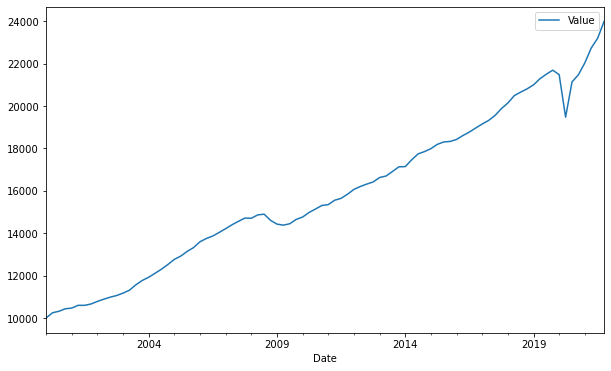

In [6]:
mydata['2000-01-01':].plot(figsize=(10,6))

In [7]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import quandl

#Import Model Packages 
from sklearn.decomposition import PCA

In [8]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [9]:
treasury_df 

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,0.02,0.34,0.74,1.16,1.58,1.78,1.89,1.98,1.99,2.36,2.29
2022-02-24,0.05,0.32,0.65,1.08,1.54,1.73,1.84,1.94,1.96,2.36,2.28
2022-02-25,0.03,0.33,0.71,1.13,1.55,1.76,1.86,1.96,1.97,2.37,2.29


In [10]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
dataset = treasury_df
type(dataset)

pandas.core.frame.DataFrame

In [12]:
# shape
dataset.shape

(15029, 11)

In [13]:
# peek at data
set_option('display.width', 100)
dataset.tail(5)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2022-02-23,0.02,0.34,0.74,1.16,1.58,1.78,1.89,1.98,1.99,2.36,2.29
2022-02-24,0.05,0.32,0.65,1.08,1.54,1.73,1.84,1.94,1.96,2.36,2.28
2022-02-25,0.03,0.33,0.71,1.13,1.55,1.76,1.86,1.96,1.97,2.37,2.29
2022-02-28,0.06,0.35,0.69,1.01,1.44,1.62,1.71,1.81,1.83,2.25,2.17
2022-03-01,0.11,0.32,0.60,0.91,1.31,1.47,1.56,1.67,1.72,2.19,2.11


In [14]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

TRESY1mo    float64
TRESY3mo    float64
TRESY6mo    float64
TRESY1y     float64
TRESY2y     float64
TRESY3y     float64
TRESY5y     float64
TRESY7y     float64
TRESY10y    float64
TRESY20y    float64
TRESY30y    float64
dtype: object

In [15]:
# describe data
set_option('precision', 3)
dataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5148.000,10124.000,10124.000,15026.000,11434.000,15026.000,15026.000,13156.000,15026.00,15029.000,11256.000
mean,1.180,3.779,3.959,4.924,5.044,5.335,5.600,5.959,5.94,6.208,6.342
std,1.452,3.250,3.365,3.456,3.812,3.338,3.202,3.265,2.99,2.834,3.049
min,0.000,0.000,0.020,0.040,0.090,0.100,0.190,0.360,0.52,0.870,0.990
25%,0.060,0.500,0.640,2.150,1.530,2.640,3.150,3.120,3.92,4.200,3.960
50%,0.480,3.570,3.760,5.000,4.895,5.390,5.550,6.100,5.74,5.970,5.830
75%,1.790,5.780,6.030,6.890,7.527,7.328,7.550,7.900,7.69,7.890,8.290
max,5.270,17.010,17.430,17.310,16.950,16.590,16.270,16.050,15.84,15.780,15.210


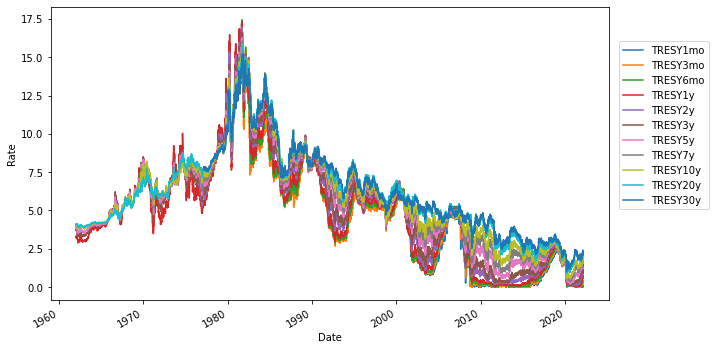

In [16]:
dataset.plot(figsize=(10,6))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

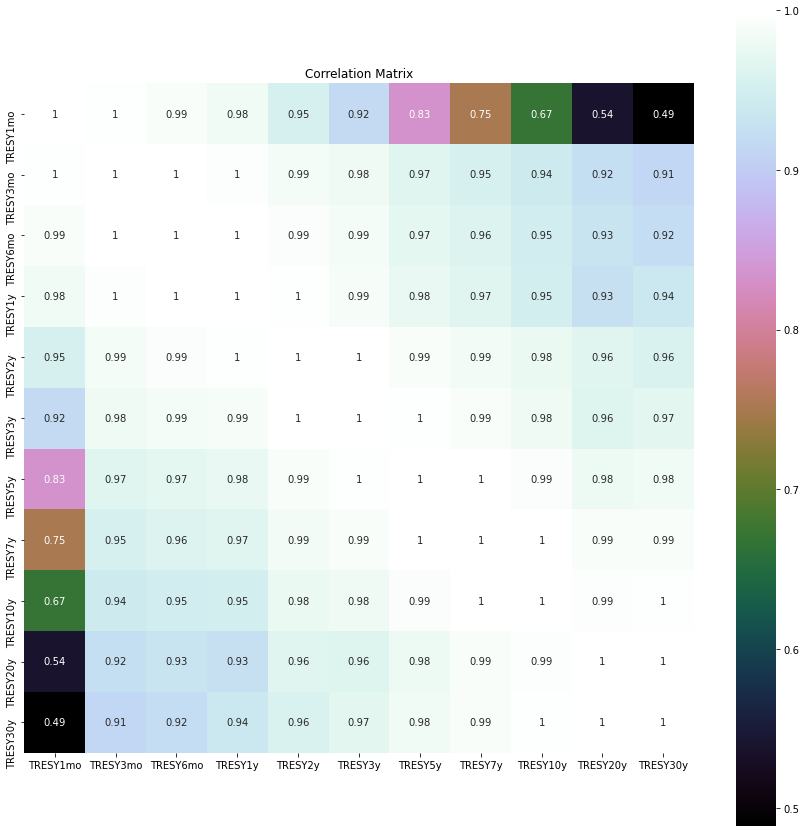

In [17]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [18]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [19]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset),columns = dataset.columns, index = dataset.index)
# summarize transformed data
dataset.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2001-07-31,1.715,1.564,1.416,1.413,1.498,1.585,1.726,1.752,1.707,1.630,1.566
2001-08-01,1.701,1.558,1.416,1.434,1.526,1.607,1.765,1.784,1.741,1.646,1.584


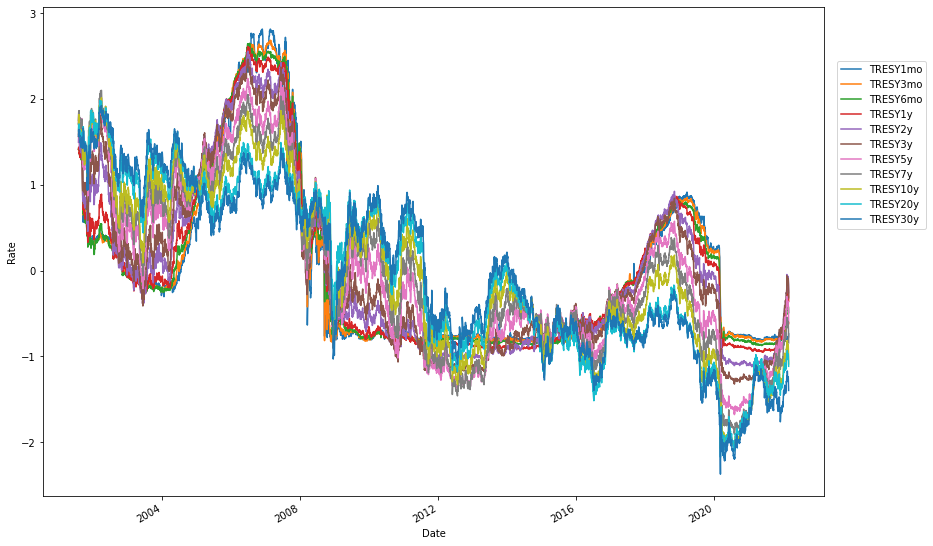

In [21]:
rescaledDataset.plot(figsize=(14,10))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

In [22]:
pca = PCA()
PrincipalComponent=pca.fit(rescaledDataset)

,Explained Variance_Top 5
0,84.80%
1,98.89%
2,99.77%
3,99.89%
4,99.94%


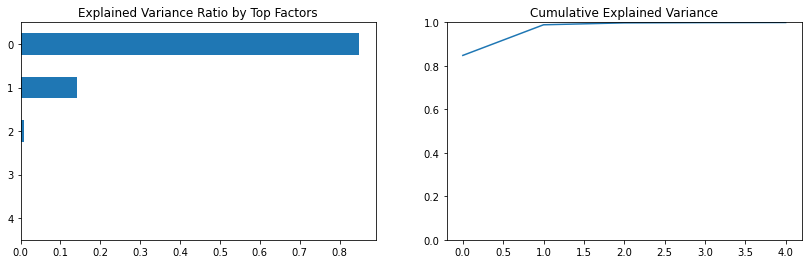

In [23]:
NumEigenvalues=5
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');

# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)

In [24]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

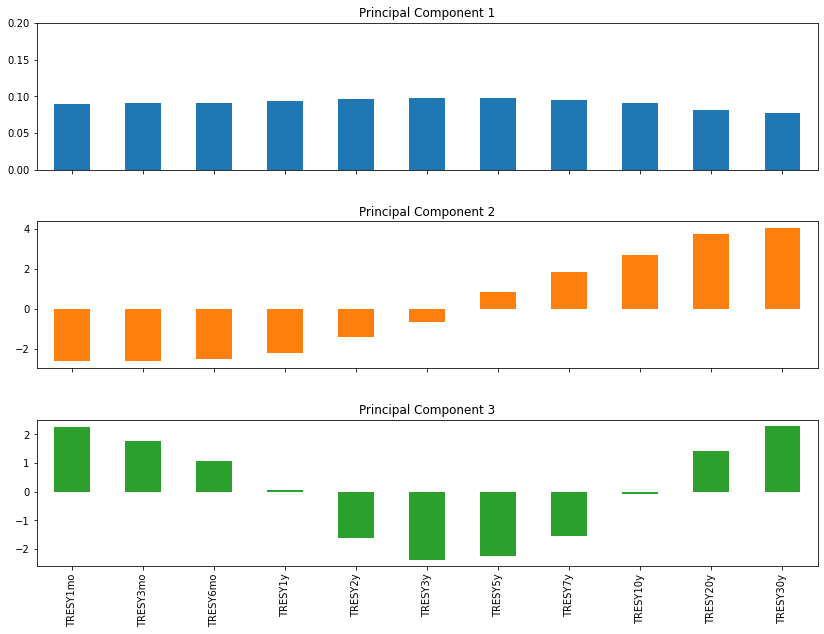

In [25]:
weights = PCWeights()
NumComponents=3    
        
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

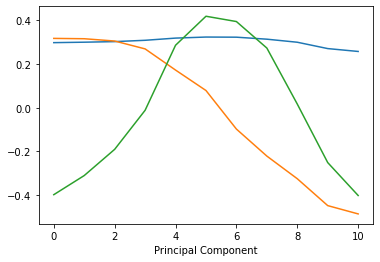

In [27]:
plt.plot(pca.components_[0:3].T)
plt.xlabel("Principal Component")
plt.show()

In [28]:
pca.transform(rescaledDataset)[:,:2]

array([[ 5.28801654, -0.36972671],
       [ 5.34575944, -0.40162488],
       [ 5.44842695, -0.45891893],
       ...,
       [-1.82582388,  0.84156722],
       [-2.06616106,  0.97513901],
       [-2.29280894,  1.03201549]])

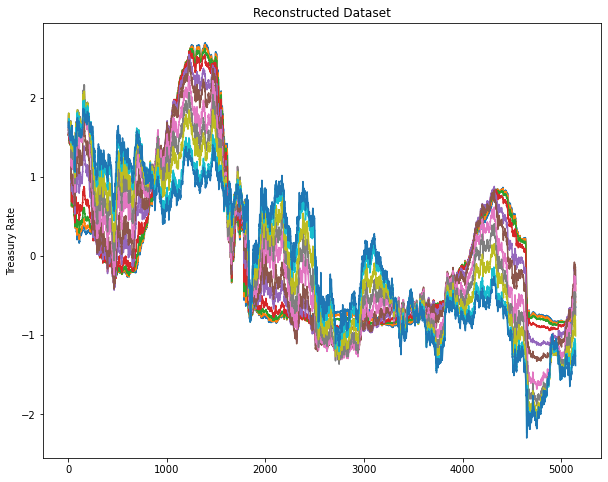

In [29]:
nComp=3
reconst= pd.DataFrame(np.dot(pca.transform(rescaledDataset)[:,:nComp], pca.components_[:nComp,:]),columns=dataset.columns)
plt.figure(figsize=(10,8))
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Reconstructed Dataset")
plt.show()